In [14]:
# New modular API usage demo
import importlib, llm_abm.viz
importlib.reload(llm_abm.viz)

from llm_abm.config import load_config
from llm_abm.simulation import run_simulation
from llm_abm.viz import plot_coverage_over_time, plot_final_beliefs
from llm_abm.viz import plot_belief_trajectories, belief_trajectories_table

cfg = load_config('config/example.yaml')
res = run_simulation(cfg)

Round 0 summary: Society generally shows moderate skepticism toward the claim that 5G towers cause illness.

=== Conversation 1 <-> 4 ===
1: Of course, I’m good with that! What’s been on your mind lately?
4: Honestly, just trying to figure out what to do this weekend. I kinda want to chill, but also feel like getting out of the house for a bit.
1: I know what you mean; it’s hard to sit still sometimes, but going out can be a lot of work. Maybe hit a nice coffee shop or check out a local art show for a little change of scenery without too much fuss.
4: Yeah, I get that. Sometimes just grabbing a coffee or hitting up an art show is a chill way to get out without doing anything too wild.
(No misinformation discussed; beliefs unchanged.)
=== End Conversation 1 <-> 4 ===


=== Conversation 0 <-> 4 ===
0: I’ve heard people worry about that, but all the studies so far say 5G is safe and doesn’t cause illness. The radiation is really low—just the same kind our old cell phones use, nothing like

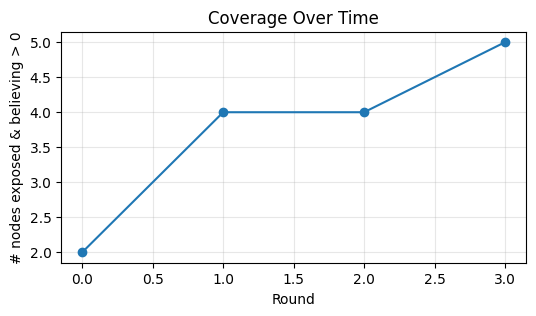

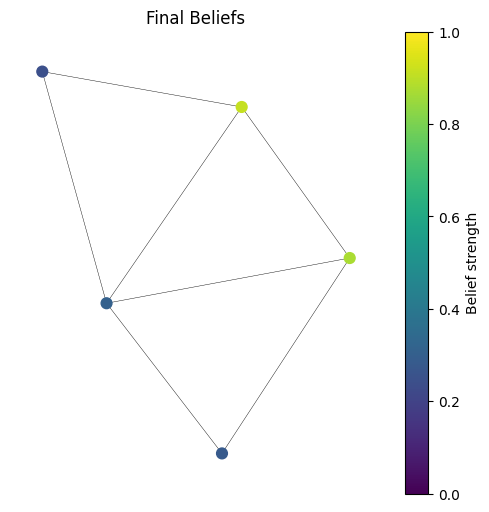

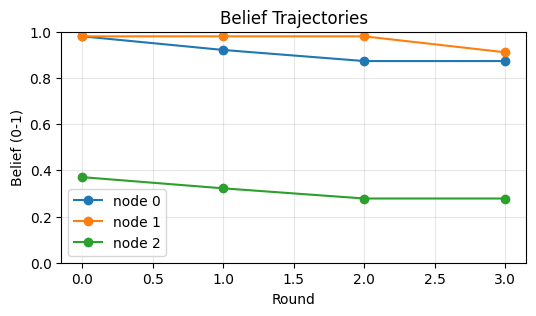

,round,0,1,2
0,0,0.980,0.980,0.370387
1,1,0.921,0.980,0.322000
2,2,0.873,0.980,0.278000
3,3,0.873,0.911,0.278000


,round,coverage,summary
0,0,2,Society generally shows moderate skepticism to...
1,1,4,Society is somewhat skeptical but not dismissi...
2,2,4,"Most people are somewhat skeptical, with a sub..."
3,3,5,Society is divided on whether 5G towers cause ...


In [15]:
import pandas as pd

plot_coverage_over_time(res['history'])
plot_final_beliefs(res['G'], res['beliefs'])
plot_belief_trajectories(res['history'], node_ids=[0, 1, 2])

df_traj = belief_trajectories_table(res['history'], node_ids=[0, 1, 2])
display(df_traj)
rows = [{'round': h['round'], 'coverage': len(h['coverage']), 'summary': h['summary']} for h in res['history']]
display(pd.DataFrame(rows))